# Import the necessary libraries


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import style
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


# Import the dataset

In [30]:
Data = pd.read_csv('cars.csv', sep=';')
Data.head()

,nom,prix,carburant,puissance,vitesse,Type,Secteur,État,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main
0,BMW série 520d,NaN,Diesel,8 CV,Automatique,"Voitures d'occasion, Vente",Hay Riad,Excellent,140 000 - 149 999,2015,BMW,Serie 5,5.0,NaN,Oui
1,Nissan cachgai neufe,195 000 DH,Diesel,6 CV,Manuelle,"Voitures d'occasion, Vente",Sidi Bernoussi,NaN,100 000 - 109 999,2017,Nissan,Qashqai,5.0,WW au Maroc,Oui
2,Range rover évoque dynamique,NaN,Diesel,8 CV,Automatique,"Voitures d'occasion, Vente",Hay Riad,Excellent,120 000 - 129 999,2018,Land Rover,Range Rover Evoque,5.0,NaN,Oui
3,Opel astra Diesel 2017,NaN,Diesel,6 CV,Manuelle,"Voitures d'occasion, Vente",Hay Salam,Excellent,55 000 - 59 999,2017,Opel,Astra,5.0,Importée neuve,Oui
4,Peugeot 301 Diesel,116 000 DH,Diesel,--,--,"Voitures d'occasion, Vente",NaN,NaN,80 000 - 84 999,2019,Peugeot,301,NaN,NaN,NaN


# Preprocessing

Understanding the structure of the data

In [31]:
Data.shape

(2793, 15)

In [32]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nom               2793 non-null   object 
 1   prix              1665 non-null   object 
 2   carburant         2793 non-null   object 
 3   puissance         2793 non-null   object 
 4   vitesse           2793 non-null   object 
 5   Type              2793 non-null   object 
 6   Secteur           2013 non-null   object 
 7   État              2104 non-null   object 
 8   Kilométrage       2792 non-null   object 
 9   Année-Modèle      2792 non-null   object 
 10  Marque            2791 non-null   object 
 11  Modèle            2791 non-null   object 
 12  Nombre de portes  2378 non-null   float64
 13  Origine           2333 non-null   object 
 14  Première main     2222 non-null   object 
dtypes: float64(1), object(14)
memory usage: 327.4+ KB


In [33]:
#Delete the columns not interesting

Data = Data.drop(["nom","Modèle", "Type", "Secteur", "Première main","Nombre de portes"], axis=1)
Data.head()

,prix,carburant,puissance,vitesse,État,Kilométrage,Année-Modèle,Marque,Origine
0,NaN,Diesel,8 CV,Automatique,Excellent,140 000 - 149 999,2015,BMW,NaN
1,195 000 DH,Diesel,6 CV,Manuelle,NaN,100 000 - 109 999,2017,Nissan,WW au Maroc
2,NaN,Diesel,8 CV,Automatique,Excellent,120 000 - 129 999,2018,Land Rover,NaN
3,NaN,Diesel,6 CV,Manuelle,Excellent,55 000 - 59 999,2017,Opel,Importée neuve
4,116 000 DH,Diesel,--,--,NaN,80 000 - 84 999,2019,Peugeot,NaN


In [34]:
Data["puissance"] = Data["puissance"].replace('--', np.nan)   
Data["vitesse"] = Data["vitesse"].replace('--', np.nan)   
Data.head()

,prix,carburant,puissance,vitesse,État,Kilométrage,Année-Modèle,Marque,Origine
0,NaN,Diesel,8 CV,Automatique,Excellent,140 000 - 149 999,2015,BMW,NaN
1,195 000 DH,Diesel,6 CV,Manuelle,NaN,100 000 - 109 999,2017,Nissan,WW au Maroc
2,NaN,Diesel,8 CV,Automatique,Excellent,120 000 - 129 999,2018,Land Rover,NaN
3,NaN,Diesel,6 CV,Manuelle,Excellent,55 000 - 59 999,2017,Opel,Importée neuve
4,116 000 DH,Diesel,NaN,NaN,NaN,80 000 - 84 999,2019,Peugeot,NaN


In [35]:
#Delete rows with Nan values.

Data = Data.dropna()
Data.head()

,prix,carburant,puissance,vitesse,État,Kilométrage,Année-Modèle,Marque,Origine
25,265 000 DH,Diesel,7 CV,Automatique,Neuf,0 - 4 999,2022,Dacia,WW au Maroc
26,220 000 DH,Diesel,7 CV,Automatique,Bon,100 000 - 109 999,2014,Mercedes-Benz,Importée neuve
32,150 000 DH,Diesel,8 CV,Automatique,Très bon,200 000 - 249 999,2014,Volvo,WW au Maroc
46,115 000 DH,Diesel,6 CV,Manuelle,Excellent,55 000 - 59 999,2019,Citroen,WW au Maroc
47,150 000 DH,Diesel,6 CV,Automatique,Excellent,55 000 - 59 999,2019,Renault,WW au Maroc


In [36]:
Data["prix"] = Data["prix"].str.replace('\s+', '')                #delete the space in the column 'Prix'
#Data["Kilométrage"] = Data["Kilométrage"].str.replace('\s+', '')  #delete the space in the column 'Kilométrage'
Data["puissance"] = Data["puissance"].str.replace('\s+', '')      #delete the space in the column 'Puissance'
Data.head()

C:\Users\Angeleco\AppData\Local\Temp\ipykernel_1560\3326780521.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Data["prix"] = Data["prix"].str.replace('\s+', '')                #delete the space in the column 'Prix'
C:\Users\Angeleco\AppData\Local\Temp\ipykernel_1560\3326780521.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Data["puissance"] = Data["puissance"].str.replace('\s+', '')      #delete the space in the column 'Puissance'


,prix,carburant,puissance,vitesse,État,Kilométrage,Année-Modèle,Marque,Origine
25,265000DH,Diesel,7CV,Automatique,Neuf,0 - 4 999,2022,Dacia,WW au Maroc
26,220000DH,Diesel,7CV,Automatique,Bon,100 000 - 109 999,2014,Mercedes-Benz,Importée neuve
32,150000DH,Diesel,8CV,Automatique,Très bon,200 000 - 249 999,2014,Volvo,WW au Maroc
46,115000DH,Diesel,6CV,Manuelle,Excellent,55 000 - 59 999,2019,Citroen,WW au Maroc
47,150000DH,Diesel,6CV,Automatique,Excellent,55 000 - 59 999,2019,Renault,WW au Maroc


In [37]:
conditions = [
    (Data.Kilométrage ==  '0 - 4 999') | (Data.Kilométrage == '5 000 - 9 999') | (Data.Kilométrage == '10 000 - 14 999') |  (Data.Kilométrage == '15 000 - 19 999') | (Data.Kilométrage == '20 000 - 24 999') | (Data.Kilométrage == '25 000 - 29 999') | (Data.Kilométrage == '30 000 - 34 999') | (Data.Kilométrage == '35 000 - 39 999') | (Data.Kilométrage == '40 000 - 44 999') | (Data.Kilométrage == '45 000 - 49 999') | (Data.Kilométrage == '50 000 - 54 999') | (Data.Kilométrage == '55 000 - 59 999') |  (Data.Kilométrage == '60 000 - 64 999') | (Data.Kilométrage == '65 000 - 69 999') | (Data.Kilométrage == '70 000 - 74 999') | (Data.Kilométrage == '75 000 - 79 999') | (Data.Kilométrage == '80 000 - 84 999') | (Data.Kilométrage == '85 000 - 89 999') | (Data.Kilométrage == '90 000 - 94 999') | (Data.Kilométrage == '95 000 - 99 999'),
    (Data.Kilométrage == '100 000 - 109 999') | (Data.Kilométrage == '110 000 - 119 999') | (Data.Kilométrage == '120 000 - 129 999') | (Data.Kilométrage == '130 000 - 139 999') | (Data.Kilométrage == '140 000 - 149 999') | (Data.Kilométrage == '150 000 - 159 999') | (Data.Kilométrage == '160 000 - 169 999') | (Data.Kilométrage == '170 000 - 179 999') | (Data.Kilométrage == '180 000 - 189 999') | (Data.Kilométrage == '190 000 - 199 999'),
    (Data.Kilométrage == '200 000 - 249 999') | (Data.Kilométrage == '250 000 - 299 999') | (Data.Kilométrage == '300 000 - 349 999') | (Data.Kilométrage == '350 000 - 399 999') | (Data.Kilométrage == '400 000 - 449 999') | (Data.Kilométrage == '450 000 - 499 999'),
    (Data.Kilométrage == 'Plus de 500 000') ]

choices = [
    'A',
    'B',
    'C',
    'D']

In [38]:
Data['km'] = np.select(conditions, choices, default=np.nan)

In [39]:
Data.head()

,prix,carburant,puissance,vitesse,État,Kilométrage,Année-Modèle,Marque,Origine,km
25,265000DH,Diesel,7CV,Automatique,Neuf,0 - 4 999,2022,Dacia,WW au Maroc,A
26,220000DH,Diesel,7CV,Automatique,Bon,100 000 - 109 999,2014,Mercedes-Benz,Importée neuve,B
32,150000DH,Diesel,8CV,Automatique,Très bon,200 000 - 249 999,2014,Volvo,WW au Maroc,C
46,115000DH,Diesel,6CV,Manuelle,Excellent,55 000 - 59 999,2019,Citroen,WW au Maroc,A
47,150000DH,Diesel,6CV,Automatique,Excellent,55 000 - 59 999,2019,Renault,WW au Maroc,A


In [40]:
Data['puissance'] = Data['puissance'].str.replace('CV','')    #delete the string ' CV' in the column 'Puissance'
Data['puissance'] = Data['puissance'].str.replace('Plusde','')    #delete the string ' CV' in the column 'Puissance'
Data['prix'] = Data['prix'].str.replace('DH','')              #delete the string ' DH' in the column 'Prix'
Data['Année-Modèle'] = Data['Année-Modèle'].str.replace(' ou plus ancien','') 

In [41]:
Data = Data.drop(["Kilométrage"], axis=1)
Data.head()

,prix,carburant,puissance,vitesse,État,Année-Modèle,Marque,Origine,km
25,265000,Diesel,7,Automatique,Neuf,2022,Dacia,WW au Maroc,A
26,220000,Diesel,7,Automatique,Bon,2014,Mercedes-Benz,Importée neuve,B
32,150000,Diesel,8,Automatique,Très bon,2014,Volvo,WW au Maroc,C
46,115000,Diesel,6,Manuelle,Excellent,2019,Citroen,WW au Maroc,A
47,150000,Diesel,6,Automatique,Excellent,2019,Renault,WW au Maroc,A


In [42]:
#checking the types of all data
Data.dtypes

prix            object
carburant       object
puissance       object
vitesse         object
État            object
Année-Modèle    object
Marque          object
Origine         object
km              object
dtype: object

In [43]:
Data = Data.astype({"prix": float})
Data = Data.astype({"puissance": float})
Data = Data.astype({"Année-Modèle": int})
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 25 to 2792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prix          1058 non-null   float64
 1   carburant     1058 non-null   object 
 2   puissance     1058 non-null   float64
 3   vitesse       1058 non-null   object 
 4   État          1058 non-null   object 
 5   Année-Modèle  1058 non-null   int32  
 6   Marque        1058 non-null   object 
 7   Origine       1058 non-null   object 
 8   km            1058 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 78.5+ KB


# Visualising Categorical Data
- Carburant
- Vitesse
- Etat
- Origine
- Marque


C:\Users\Angeleco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Angeleco\anac

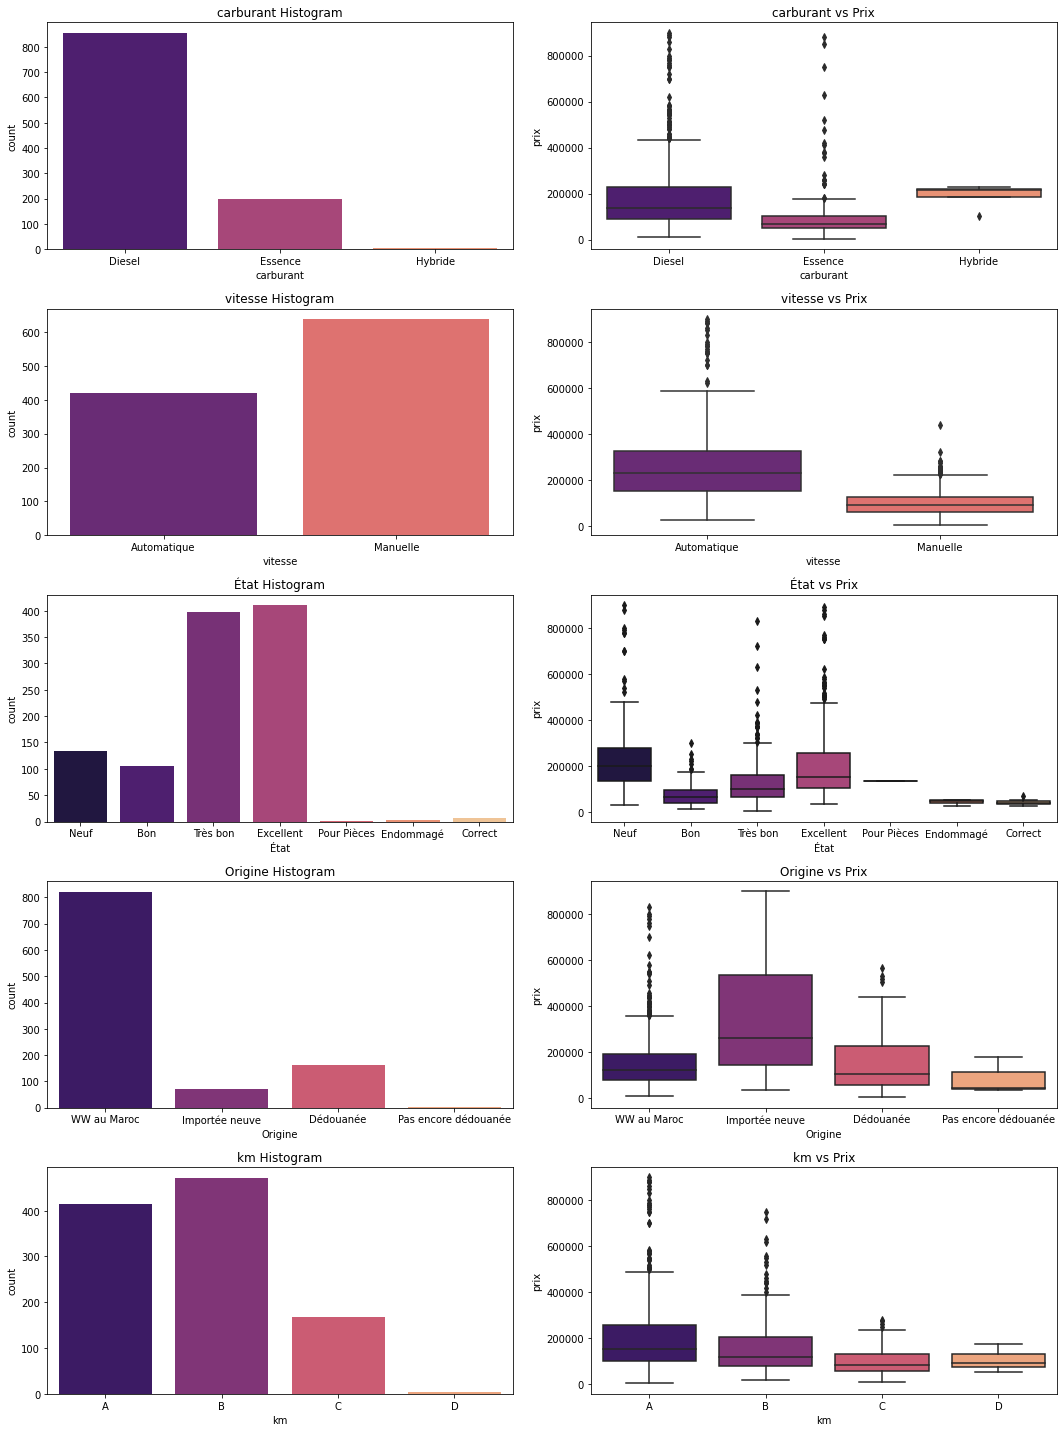

In [44]:
def plot_count(x,fig):
    plt.subplot(5,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(Data[x],palette=("magma"))
    plt.subplot(5,2,(fig+1))
    plt.title(x+' vs Prix')
    sns.boxplot(x=Data[x], y=Data.prix, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('carburant', 1)
plot_count('vitesse', 3)
plot_count('État', 5)
plot_count('Origine', 7)
plot_count('km', 9)

plt.tight_layout()

# Step 3.2: Visualising numerical data

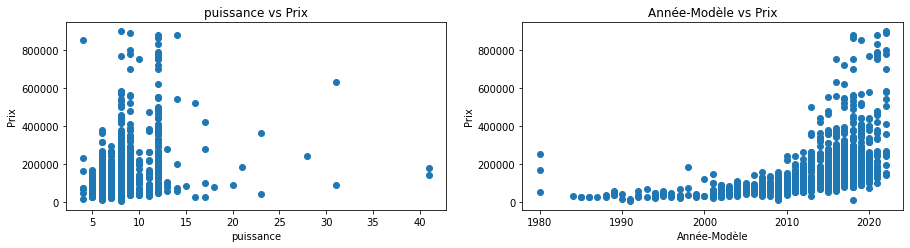

In [45]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(Data[x],Data['prix'])
    plt.title(x+' vs Prix')
    plt.ylabel('Prix')
    plt.xlabel(x)

plt.figure(figsize=(15,20))

scatter('puissance', 1)
scatter('Année-Modèle', 2)



Inference :

1) Puissance doesn't show any significant trend with price.

2) Année-Modèle seems to have a positive correlation with price.

# Model Development

LABEL ENCODING

In [46]:
Data = pd.get_dummies(Data, columns = ['carburant', 'vitesse', 'État', 'Origine', 'km'])
Data.head()

,prix,puissance,Année-Modèle,Marque,carburant_Diesel,carburant_Essence,carburant_Hybride,vitesse_Automatique,vitesse_Manuelle,État_Bon,...,État_Pour Pièces,État_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc,km_A,km_B,km_C,km_D
25,265000.0,7.0,2022,Dacia,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
26,220000.0,7.0,2014,Mercedes-Benz,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
32,150000.0,8.0,2014,Volvo,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
46,115000.0,6.0,2019,Citroen,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
47,150000.0,6.0,2019,Renault,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


Splitting the data and target

In [47]:
X = Data.drop(['prix','Marque'], axis=1)
Y = Data['prix']

In [48]:
print("Shape of X is :", X.shape)
print("Shape of Y is :", Y.shape)

Shape of X is : (1058, 22)
Shape of Y is : (1058,)


Training and Testing Data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Find best model using GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_Forest' : {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['squared_error','absolute_error','poisson'],
                'max_features': ['auto', 'sqrt']
            }
        },
        'Gradient_Boosting' : {
            'model': GradientBoostingRegressor(),
            'params': {
                'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
                'criterion' : ['friedman_mse','squared_error','mse']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.696e+11, tolerance: 1.613e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.649e+12, tolerance: 1.672e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.551e+12,

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for Rand

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tre

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Angeleco\anaconda3\lib\site-packages\sklearn\tr

,model,best_score,best_params
0,linear_regression,0.591588,{'normalize': False}
1,lasso,0.591590,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.679906,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,Random_Forest,0.790627,"{'criterion': 'absolute_error', 'max_features'..."
4,Gradient_Boosting,0.807771,"{'criterion': 'mse', 'loss': 'squared_error'}"


In [51]:
final_rf_model = RandomForestRegressor(criterion='squared_error', max_features='sqrt')
final_rf_model.fit(X_train,Y_train)
final_rf_model.score(X_test,Y_test)

0.7299391885538989

In [59]:
final_gb_model = GradientBoostingRegressor(criterion='friedman_mse', loss='squared_error')
final_gb_model.fit(X_train,Y_train)
final_gb_model.score(X_test,Y_test)

0.764131671964291

Based on above results we can say that Gradient Boosting Regressorssor gives the best score.

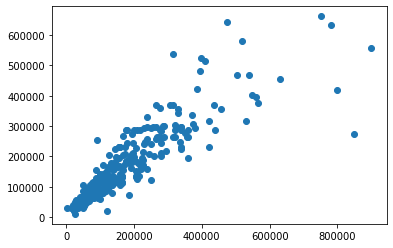

In [53]:
predictions=final_gb_model.predict(X_test)
plt.scatter(Y_test,predictions)

# Exporting the tested model to a pickle file

In [57]:
import pickle
with open('price_predicting_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(final_gb_model, file)